In [1]:
import ROOT
#%jsroot on
from PUDataProvider import PUDataLoader

Welcome to JupyROOT 6.24/00


In [2]:
a = ROOT.TFile.Open("a.root" , "recreate")
puds = PUDataLoader( "test2", [279116,278804 ], 'nVertices', 'PHYSICSDel', MCTUNE = 5 ,
                    var_nb = -1 , var_f = None, var_l = None , lumi_steps = 10 , lumi_nbinsperstep = 1 , xs_nb = 200 , xs_f = 0 , xs_l = 100 , fout = a );


(PHYSICSDel>0)
array('d', [3.0]) array('d', [44.0])
3.0 44.0 41.0
maxPU = 124
array('d', [53.129073045]) array('d', [143.836590584])
min/max lumi 53.129073045 143.836590584
(PHYSICSDel>53.129073045)&&(62.199824798899996>PHYSICSDel)
array('d', [6.0]) array('d', [20.0])
(PHYSICSDel>62.199824798899996)&&(71.2705765528>PHYSICSDel)
array('d', [5.0]) array('d', [28.0])
(PHYSICSDel>71.2705765528)&&(80.3413283067>PHYSICSDel)
array('d', [5.0]) array('d', [34.0])
(PHYSICSDel>80.3413283067)&&(89.4120800606>PHYSICSDel)
array('d', [3.0]) array('d', [37.0])
(PHYSICSDel>89.4120800606)&&(98.4828318145>PHYSICSDel)
array('d', [4.0]) array('d', [41.0])
(PHYSICSDel>98.4828318145)&&(107.5535835684>PHYSICSDel)
array('d', [5.0]) array('d', [43.0])
(PHYSICSDel>107.5535835684)&&(116.6243353223>PHYSICSDel)
array('d', [7.0]) array('d', [44.0])
(PHYSICSDel>116.6243353223)&&(125.6950870762>PHYSICSDel)
array('d', [8.0]) array('d', [41.0])
(PHYSICSDel>125.6950870762)&&(134.7658388301>PHYSICSDel)
array('d', [13.0]) a

In [3]:
gf0 = puds.FitAllRanges(binned=True)
gf1 = puds.FitAllRanges(binned=True , var_range=[3,3] )
gf2 = puds.FitAllRanges(binned=False , var_range=[3,3] )

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdfstep_0_Int[nVertices]) using numeric integrator RooIntegrator1D to calculate Int(nVertices)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 8 remote server process.
[#0] WARNING:Minization -- RooMinimizerFcn::synchronize: WARNING: no initial error estimate available for xsection_test20: using 10
 **********
 **    1 **SET PRINT           0
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 xsection_test20   5.00000e+01  1.00000e+01    0.00000e+00  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           0
 **********
 **********
 **    5 **SET STR           1
 **********
 **********
 **    6 **MIGRAD         500           1
 **********
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdfs

In [5]:
%jsroot on
c = ROOT.TCanvas("C")
c.Divide(3,1)
cc = c.cd(1)
gf0.Draw("A pmc plc")
cc.BuildLegend()
cc = c.cd(2)
gf1.Draw("A pmc plc")
#puds.lumiRanges[4].pdf.getTheHist().StatOverflows(True)
#puds.lumiRanges[4].pdf.getTheHist().Draw("COLZ")
#puds.hPUvsVar.Draw("COLZ")
cc.BuildLegend()
cc = c.cd(3)
gf2.Draw("A pmc plc")
cc.BuildLegend()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdfstep_0) p.d.f was fitted in a subrange and no explicit Range() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.setStringAttribute("fitrange", nullptr);
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdfstep_0) only plotting range 'fit_nll_pdfstep_0_DS_test2_step_0'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdfstep_0) p.d.f. curve is normalized using explicit choice of ranges ''
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdfstep_0_Int[nVertices]) using numeric integrator RooIntegrator1D to calculate Int(nVertices)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdfstep_0_Int[nVertices|]_Norm[nVertices]) using numeric integrator Ro

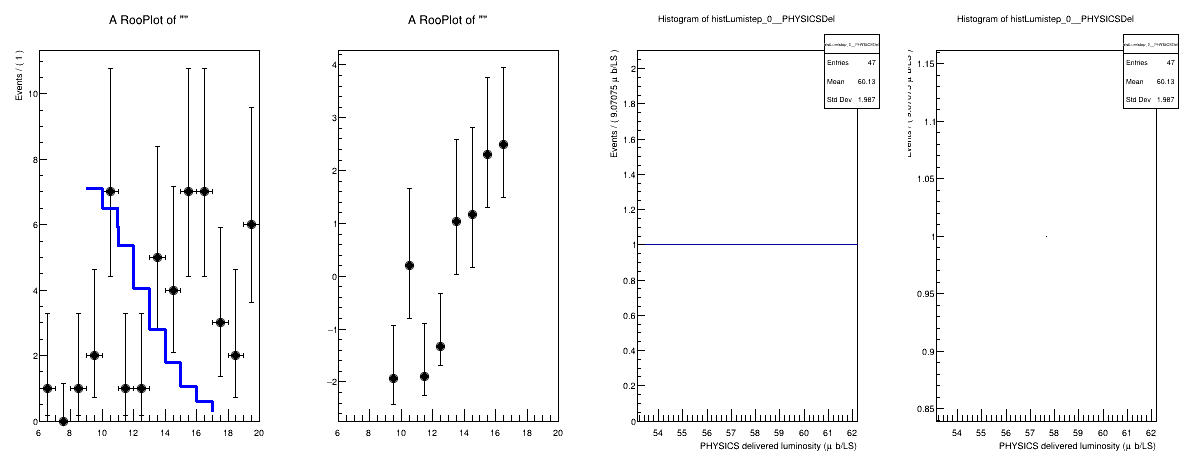

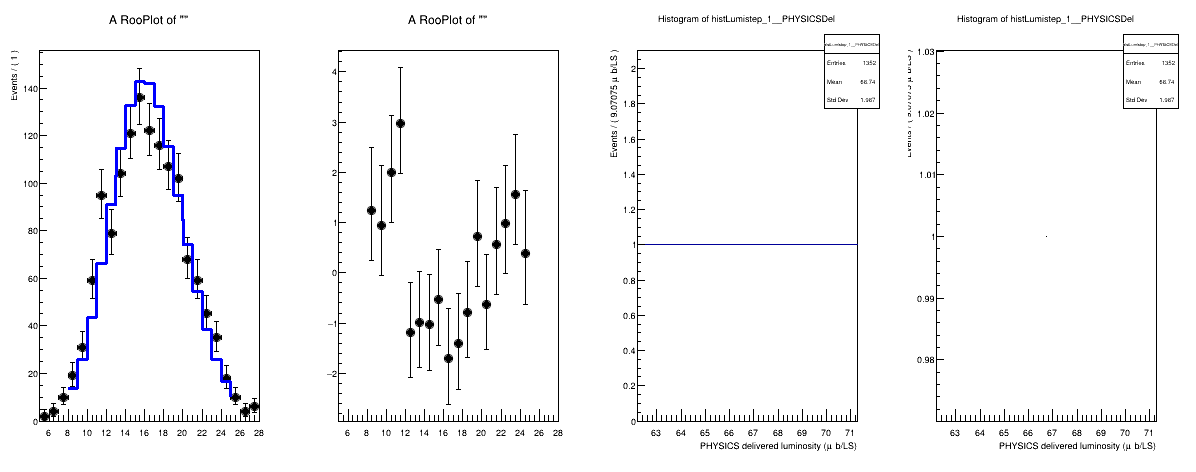

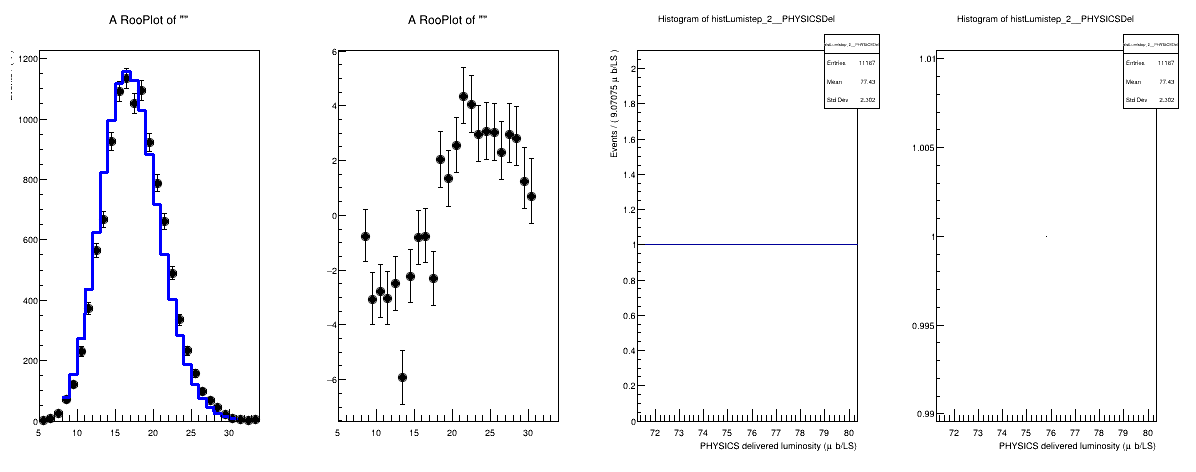

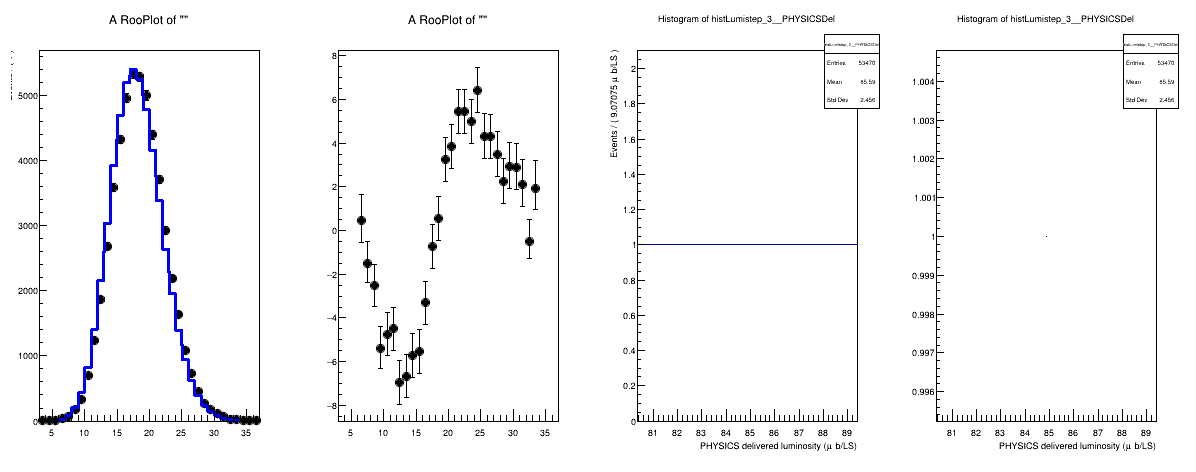

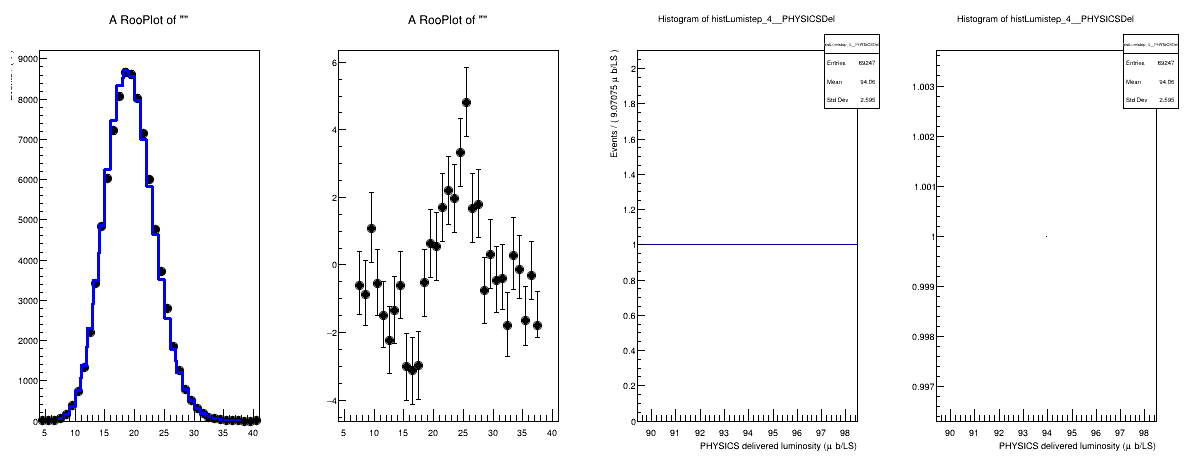

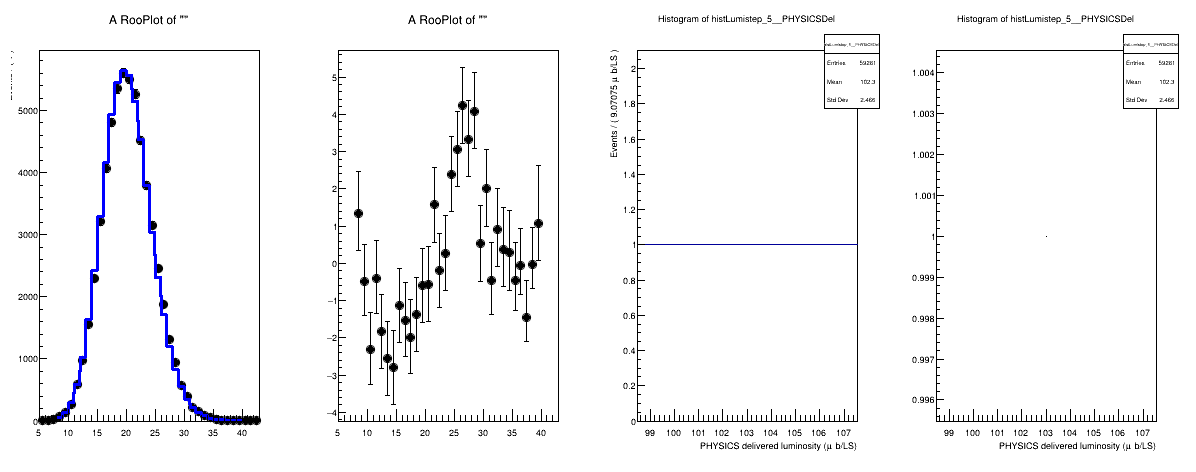

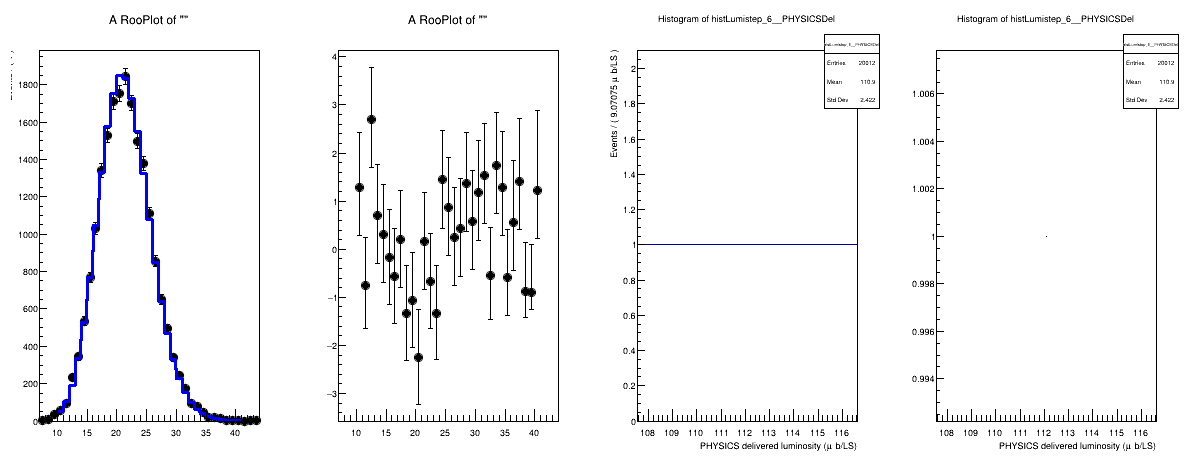

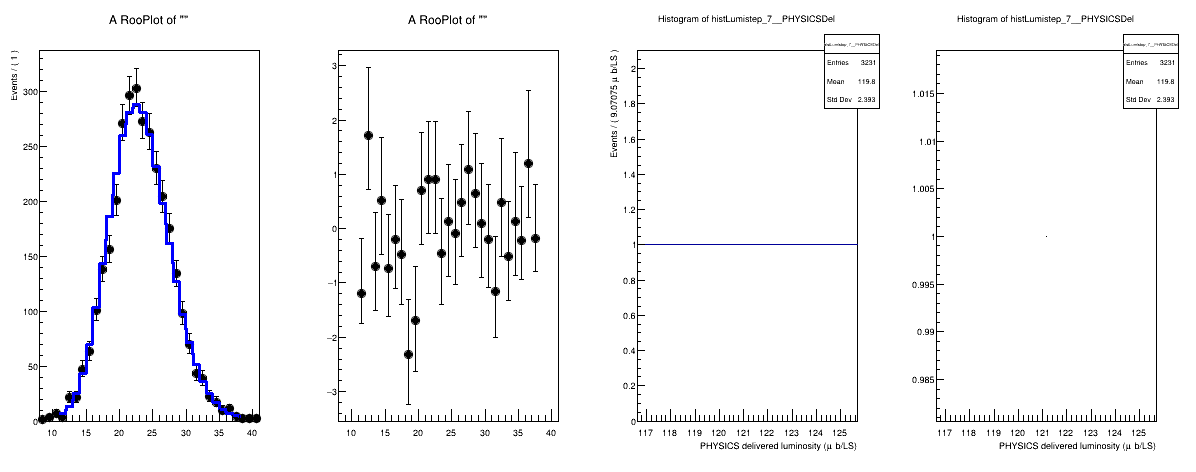

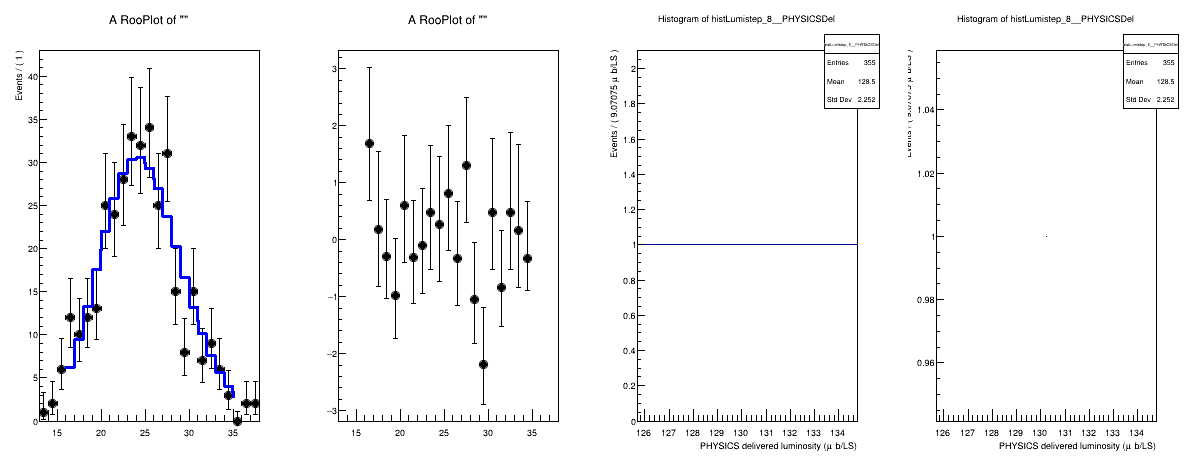

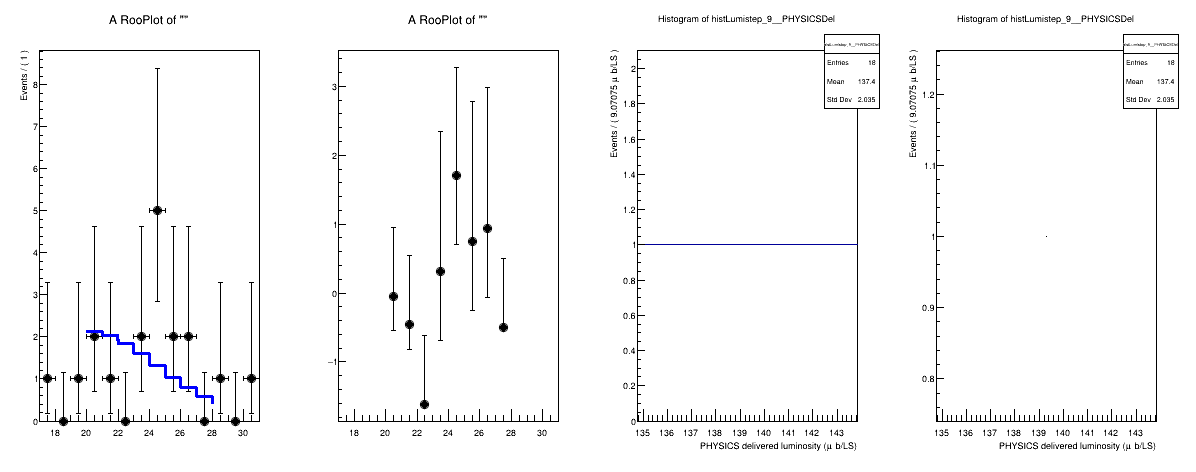

In [6]:
%jsroot off
puds.DrawAllPlots(0)
#puds.DrawAllPlots()
#puds.lumiRanges[0].ChooseDsToFit(True)
#cc = puds.lumiRanges[0].MakeCanvas()
#cc = puds.lumiRanges[0].Canvas
#cc.cd(0)
#print( len(puds.lumiRanges) )
#puds.lumiRanges[0].hLumiDist.Draw()
#cc.Draw()
#puds.lumiRanges[0].fitResult.status()

In [ ]:
def plotLumiRange(i):
    canvas = ROOT.TCanvas("canvas_range{0}".format(i))
    lumiallRange[i].append( canvas )
    canvas.Divide(3)
    canvas.cd(1)
    lumiallRange[i][3].Draw("")
    
    canvas.cd(2)
    frame = variable.frame()
    lumiallRange[i][6].plotOn(frame)
    lumiallRange[i][4].plotOn(frame) 
    frame.Draw()
    
    canvas.cd(3)
    hpull = frame.pullHist()
    frame2 = variable.frame()
    frame2.addPlotable(hpull, "P")
    frame2.GetYaxis().SetTitleOffset(1.6)
    frame2.Draw()
    
    canvas.Draw()
    
plotLumiRange(1)

In [ ]:
c = puds.lumiRanges[5].MakeCanvas()

In [ ]:
def clearhist(h):
    for j in range(20,80):
        h.SetBinContent(1,j,0)
clearhist(hPUvsVar)
hPUvsVar.Draw("COLZ")
c.Draw()
